In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from core.data import load_from_kaggle


In [62]:
dataset_link = "yunusemretokdemir/customer-segmentation" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\customer-segmentation' already exists with files. Skipping download (replace=False).


In [3]:
files

['PBL5recommendationdata.csv', 'PBL5recommendationdata_cut.csv']

In [80]:
# load data
#df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")

#for col in df.columns:
#    print(col)


In [ ]:
## Selecting the most relevant columns for further analysis
# % null
null_value = (df.isna().mean() * 100)
null_value.tail(10)

Products.installation       85.312351
Products.shipping_length     4.673343
Products.shipping_width      4.673343
Products.shipping_height     4.673343
Products.shipping_weight    84.287077
Products.handling_time      76.204101
Products.size               65.593705
Products.material           80.877444
Products.family_id           7.749165
Products.saved_status        6.294707
dtype: float64

In [ ]:
## Selecting the most relevant columns for further analysis

# list of columns with less than 99% null values 

ohne_null_cols = null_value[null_value < 90].index.tolist()
len(ohne_null_cols)
ohne_null_cols

# df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=ohne_null_cols, encoding="latin1")



['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.mailing',
 'Customers.last_modified',
 'Customers.customer_type',
 'Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.currency',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.total',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.tracking',
 'Orders.payment_status',
 'Orders.payment_date',
 'Orders.payment_user',
 'Orders.payment_type',
 'Orders.payment_method',
 'Orders.payment_amount',
 'Orders.payment_id',
 'Orders.payment_code',
 'Orders.status',
 'Orders.placed_date',
 'Orders.updated_date',
 'Orders.shipped_date',
 'Orders.notes',
 'Orders.customer_type',
 'Order_Items.id',
 'Order_Items.parent',
 'Order_Items.product_id',
 'Order_Items.product_name',
 'Order_Items.qty',
 'Order_Items.price',
 'Order_Items.cost',
 '

In [ ]:
df.head(10)
high_null_cols = null_value[null_value > 90].index.tolist()

len(high_null_cols)

high_null_cols

# drop high null columns
#df = df.drop(columns=high_null_cols)

In [133]:
### Selecting the most relevant columns for further analysis --->

cols_use = [
    "Customers.id", "Customers.fname", "Customers.lname", "Customers.company",
    "Customers.create_date", "Customers.mailing", "Customers.last_modified",
    "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname",
    "Orders.company", "Orders.order_number", "Orders.reorder_id",
    "Orders.external_source", "Orders.external_id", "Orders.subtotal",
    "Orders.tax", "Orders.shipping", "Orders.coupon_id", "Orders.coupon_amount",
    "Orders.fee_name", "Orders.fee_amount", "Orders.discount_name",
    "Orders.discount_amount", "Orders.total", "Orders.balance_due",
    "Orders.shipping_carrier", "Orders.shipping_method", "Orders.payment_status",
    "Orders.payment_date", "Orders.payment_user", "Orders.payment_type",
    "Orders.payment_method", "Orders.payment_amount", "Orders.payment_id",
    "Orders.payment_code", "Orders.status", "Orders.placed_date",
    "Orders.updated_date", "Orders.shipped_date", "Orders.comments",
    "Order_Items.id", "Order_Items.parent", "Order_Items.product_id",
    "Order_Items.product_name", "Order_Items.qty", "Order_Items.price",
    "Order_Items.cost", "Order_Items.reorder_frequency",
    "Products.id", "Products.status", "Products.vendor", "Products.import_id",
    "Products.name", "Products.display_name", "Products.list_price",
    "Products.price", "Products.sale_price", "Products.cost",
    "Products.last_modified", "Products.taxable", "Products.shopping_brand",
    "Products.shopping_mpn", "Products.shopping_color",
    "Products.pricegrabber_cat", "Products.shopzilla_cat",
    "Products.thefind_cat", "Products.quickbooks_id",
    "Products.qb_edit_sequence", "Products.short_description", "Products.unit",
    "Products.packaging", "Products.display_packaging", "Products.multiple",
    "Products.latex", "Products.case_qty", "Products.notes",
    "Products.map_price", "Products.shipping_length",
    "Products.shipping_width", "Products.shipping_height",
    "Products.handling_time", "Products.family_id"
]

df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=cols_use, encoding="latin1")


C:\Users\Anna\AppData\Local\Temp\ipykernel_31996\3944395241.py:35: DtypeWarning: Columns (20,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/".join(["../data/raw/", dataset_name, "PBL5recommendationdata.csv"]), usecols=cols_use, encoding="latin1")


In [115]:
#df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), encoding="latin1")
#df = pd.read_csv("/".join(["../data/raw", dataset_name, "PBL5recommendationdata_cut.csv"]), sep=';')

df.head(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,...,Products.multiple,Products.latex,Products.case_qty,Products.notes,Products.map_price,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.handling_time,Products.family_id
0,797,Christy,Dill,Company0,1426018724,NaN,1437764306,3758,797,Christy,...,1 EA,NaN,1.0,NaN,NaN,24.80,7.50,30.40,NaN,PF61071
1,3,John,Smith,Company1,1386089139,NaN,1437764354,23,3,John,...,1 EA,Yes,1.0,OFF sale cause it is an RX item,NaN,8.00,7.00,1.50,NaN,PF02132
2,3,John,Smith,Company1,1386089139,NaN,1437764354,9531,3,John,...,1 CS,NaN,800.0,NaN,NaN,13.23,10.04,10.24,NaN,PF00342
3,4,James,Anderson,NaN,1386780263,NaN,1437762646,29,4,James,...,1 EA,Yes,1.0,NaN,NaN,10.60,7.80,18.50,NaN,PF04970
4,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,30,5,Abraham,...,1 EA,NaN,1.0,OFF sale cause it is an RX item,NaN,8.50,2.75,12.00,NaN,PF03045
5,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,226,5,Abe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,Abraham,Pollak,Company3,1386861599,0.0,1437764316,1658,5,Abraham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,peggy,thompson,NaN,1388155947,NaN,1437763617,32,7,peggy,...,1 CS,Yes,1920.0,NaN,NaN,13.60,9.20,11.30,NaN,PF01527
8,8,Randy,Pruss,NaN,1389303216,NaN,1437763421,40,8,Randy,...,1 EA,Yes,1.0,NaN,NaN,17.50,16.00,10.00,NaN,PF04706
9,10,Tommy,Smith,NaN,1390509516,NaN,1437763553,70,10,Tommy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customers.id,4194.0,1.796518e+03,1.065679e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
Customers.create_date,4194.0,1.440971e+09,1.887681e+07,1.386089e+09,1.427323e+09,1.446412e+09,1.456955e+09,1.463418e+09
Customers.mailing,2114.0,9.796594e-01,1.411959e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Customers.last_modified,4194.0,1.450401e+09,1.021334e+07,1.437559e+09,1.437763e+09,1.456954e+09,1.456956e+09,1.463418e+09
Orders.id,4194.0,9.142984e+03,5.276541e+03,2.300000e+01,4.258000e+03,9.641000e+03,1.401175e+04,1.743700e+04
Orders.customer_id,4194.0,1.796518e+03,1.065679e+03,3.000000e+00,8.652500e+02,1.747500e+03,2.698750e+03,3.736000e+03
Orders.reorder_id,82.0,7.389159e+03,3.818085e+03,3.000000e+01,4.537250e+03,6.887000e+03,1.083200e+04,1.620100e+04
Orders.external_id,5.0,6.018061e+08,1.342831e+09,6.638000e+01,1.698485e+06,1.698485e+06,1.698485e+06,3.003935e+09
Orders.subtotal,4194.0,1.319252e+02,2.311569e+02,2.890000e+00,3.675000e+01,7.474000e+01,1.399600e+02,5.163040e+03
Orders.tax,3737.0,8.008376e-01,4.859280e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329300e+02


In [134]:
df['Customers.create_date'] = pd.to_datetime(df['Customers.create_date'], unit='s')
df['Customers.last_modified'] = pd.to_datetime(df['Customers.last_modified'], unit='s')
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], unit='s')
df['Orders.payment_date'] = pd.to_datetime(df['Orders.payment_date'], unit='s')
df['Orders.updated_date'] = pd.to_datetime(df['Orders.updated_date'], unit='s')
df['Orders.shipped_date'] = pd.to_datetime(df['Orders.shipped_date'], unit='s')
df['Products.last_modified'] = pd.to_datetime(df['Products.last_modified'], unit='s')
df['Products.qb_edit_sequence'] = pd.to_datetime(df['Products.qb_edit_sequence'], unit='s')

In [135]:
df['Customers.create_date'] = pd.to_datetime(df['Customers.create_date']).dt.floor('s')
df['Customers.last_modified'] = pd.to_datetime(df['Customers.last_modified']).dt.floor('s')
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date']).dt.round('s')
df['Orders.payment_date'] = pd.to_datetime(df['Orders.payment_date']).dt.round('s')
df['Orders.updated_date'] = pd.to_datetime(df['Orders.updated_date']).dt.round('s')
df['Orders.shipped_date'] = pd.to_datetime(df['Orders.shipped_date']).dt.round('s')
df['Products.last_modified'] = pd.to_datetime(df['Products.last_modified']).dt.round('s')
df['Products.qb_edit_sequence'] = pd.to_datetime(df['Products.qb_edit_sequence']).dt.round('s')


In [184]:
#standarte Zelle

display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(4194, 63)

'Description'

,count,mean,min,25%,50%,75%,max,std
Customers.create_date,4194,2015-08-30 21:50:33.705769984,2013-12-03 16:45:39,2015-03-25 22:34:54,2015-11-01 21:00:05,2016-03-02 21:43:58.249999872,2016-05-16 17:00:49,NaN
Customers.mailing,2114.0,0.98,0.0,1.0,1.0,1.0,1.0,0.14
Customers.last_modified,4194,2015-12-18 01:06:01.111110912,2015-07-22 09:59:40,2015-07-24 18:41:19.249999872,2016-03-02 21:20:24,2016-03-02 21:53:39.750000128,2016-05-16 17:00:49,NaN
Orders.reorder_id,82.0,7389.16,30.0,4537.25,6887.0,10832.0,16201.0,3818.09
Orders.subtotal,4194.0,131.93,2.89,36.75,74.74,139.96,5163.04,231.16
Orders.tax,3737.0,0.8,0.0,0.0,0.0,0.0,132.93,4.86
Orders.shipping,3999.0,7.14,0.0,0.0,9.95,9.95,32.81,4.53
Orders.coupon_id,882.0,20.4,4.0,11.0,26.0,32.0,48.0,11.85
Orders.coupon_amount,882.0,9.97,0.0,0.68,5.0,12.24,109.9,14.62
Orders.discount_amount,364.0,13.09,0.02,3.43,6.71,9.95,588.04,51.3


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Customers.id,object,0,3054,"[396, 3618, 3662]"
Customers.fname,object,0,1501,"[Krinshnan , William , Jeffrey]"
Customers.lname,object,0,2482,"[McGowan, Boober, Johnson]"
Customers.company,object,3467,425,"[nan, nan, nan]"
Customers.create_date,datetime64[ns],0,3054,"[2015-02-04 18:37:52, 2016-01-19 15:00:05, 201..."
...,...,...,...,...
Products.shipping_length,float64,196,460,"[5.0, 3.9, 15.5]"
Products.shipping_width,float64,196,392,"[6.0, 7.0, 5.91]"
Products.shipping_height,float64,196,361,"[11.0, 17.0, nan]"
Products.handling_time,category,3196,6,"[nan, nan, nan]"


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   int64         
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   int64         
 8   Orders.customer_id             4194 non-null   int64         
 9   Orders.fname                   4194 non-null   object        
 10  Orders.lname                   4194 non-null   object        
 11  Orders.company   

In [185]:
# Reinigung der Spaltenlisten 

id_list = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id', 'Products.vendor', 'Products.import_id', 'Products.family_id'
          ]

category_list = ['Products.handling_time', 'Orders.shipping_carrier',  'Orders.payment_type',
                'Orders.payment_method', 'Products.status', 'Products.shopping_brand'
                ]

blacklist = ['Orders.external_id', 'Orders.external_source', 'Orders.fee_amount', 'Orders.payment_user', 
            'Orders.payment_id', 'Orders.payment_code', 'Orders.comments', 'Orders.fee_name',  
            'Products.pricegrabber_cat', 'Products.shopzilla_cat', 'Products.thefind_cat', 
            'Products.quickbooks_id', 'Products.qb_edit_sequence','Products.display_packaging',
            'Products.short_description', 'Products.notes', 'Products.multiple',
            'Products.latex', 'Products.map_price'
            ]  # 'Products.packaging'

blacklist2 = ['Orders.lname','Orders.fname']   

blacklist3 = ['Products.shopping_mpn', 'Products.display_name'] 


In [186]:
for col in id_list:
    df[col] = df[col].astype("object")

for col in category_list:
    df[col] = df[col].astype("category")   

In [ ]:
####                                   df_backup

#df_backup = df.copy()
#df = df_backup.copy()


In [180]:
mismatch = df[
    (df['Orders.lname'] != df['Customers.lname']) |
    (df['Orders.fname'] != df['Customers.fname'])
]

mismatch = mismatch.reset_index(drop=True)

mismatch[[
    'Customers.id',
    'Customers.fname', 'Orders.fname',
    'Customers.lname', 'Orders.lname'
]]

,Customers.id,Customers.fname,Orders.fname,Customers.lname,Orders.lname
0,5,Abraham,Abe,Pollak,Pollak
1,100,Arlene,Luis,Maldonado,Moriel.a
2,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
3,185,RAUL,RAUL,IGNACIO RASCON CARRILLO,IGNACIO RASCON CARRILLO
4,308,James,James,James,Watson
5,453,Herbert M,Matthew,Levy,Levy
6,453,Herbert M,Matthew,Levy,Levy
7,505,Hilltop,Hilltop,RYS ATU,RYS/ ATU
8,707,Marcus Castro,Marcus Castro,Co Realogy Corp.,C/o Realogy Corp.
9,708,Brian,Joshua,Kuester,Olson


In [ ]:
#Change only the first character, keep the rest unchanged
df['Customers.fname'] = df['Customers.fname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
df['Customers.lname'] = df['Customers.lname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
df['Orders.fname'] = df['Orders.fname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)
df['Orders.lname'] = df['Orders.lname'].str.replace(r'^[a-z]', lambda x: x.group(0).upper(), regex=True)

In [ ]:
# Clean text fields (remove special characters) 

df['Customers.lname'] = df['Customers.lname'].str.replace(r'[^a-zA-Z0-9\s\-\'\., ]', '', regex=True)
df['Customers.fname'] = df['Customers.fname'].str.replace(r'[^a-zA-Z0-9\s\-\'\., ]', '', regex=True)

In [ ]:
# check 

#mask = df['Orders.fname'].str.contains(r'[^a-zA-Z0-9\s\-\'\., ]', regex=True, na=False)
#df_bad = df[mask]
#df_bad

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,...,Products.multiple,Products.latex,Products.case_qty,Products.notes,Products.map_price,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.handling_time,Products.family_id
2255,1895,Maryjane Zimmermann,Elizabeth Schmidt,NaN,2015-12-07 19:19:15,NaN,2016-03-02 21:16:16,9457,1895,Maryjane Zimmermann/,...,1 CS,Yes,500.0,NaN,NaN,17.0,9.0,10.25,NaN,PF06356
2842,2416,Ridgewood High School co,Thomas Parrillo,NaN,2016-02-04 16:07:09,NaN,2016-03-02 21:30:03,12411,2416,Ridgewood High School c/o,...,1 EA,NaN,1.0,Listed on Ebay,NaN,34.0,15.0,37.00,NaN,PF05425


In [182]:
df = df.drop(columns=blacklist)
df = df.drop(columns=blacklist2)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customers.id                   4194 non-null   object        
 1   Customers.fname                4194 non-null   object        
 2   Customers.lname                4194 non-null   object        
 3   Customers.company              727 non-null    object        
 4   Customers.create_date          4194 non-null   datetime64[ns]
 5   Customers.mailing              2114 non-null   float64       
 6   Customers.last_modified        4194 non-null   datetime64[ns]
 7   Orders.id                      4194 non-null   object        
 8   Orders.customer_id             4194 non-null   object        
 9   Orders.company                 728 non-null    object        
 10  Orders.order_number            4194 non-null   object        
 11  Orders.reorder_id

In [188]:
mismatch = df[(df['Customers.id'] != df['Orders.customer_id'])]
mismatch[['Customers.id']]

,Customers.id


In [189]:
# bearbeiten Category-Spaltenlisten 

#df['Orders.id'].nunique(), df['Customers.id'].nunique(), 
#df.nunique().sort_values()
df.nunique()[ (df.nunique() > 1) & (df.nunique() < 20) ]


Customers.mailing                 2
Orders.shipping_carrier          11
Orders.shipping_method           14
Orders.payment_status             3
Orders.payment_type               5
Orders.payment_method             4
Orders.status                    10
Order_Items.reorder_frequency     4
Products.status                   5
Products.vendor                   8
Products.import_id               10
Products.taxable                  2
Products.handling_time            6
dtype: int64

In [192]:
# % null
# 
null_value = (df.isna().mean() * 100).sort_values(ascending=False)
null_value.head(15)


Order_Items.reorder_frequency    99.427754
Orders.reorder_id                98.044826
Orders.discount_name             93.276109
Orders.balance_due               91.630901
Orders.discount_amount           91.320935
Orders.payment_method            82.784931
Customers.company                82.665713
Orders.company                   82.641869
Orders.coupon_amount             78.969957
Orders.coupon_id                 78.969957
Products.handling_time           76.204101
Products.sale_price              72.341440
Products.shopping_color          59.465904
Customers.mailing                49.594659
Products.case_qty                37.100620
dtype: float64

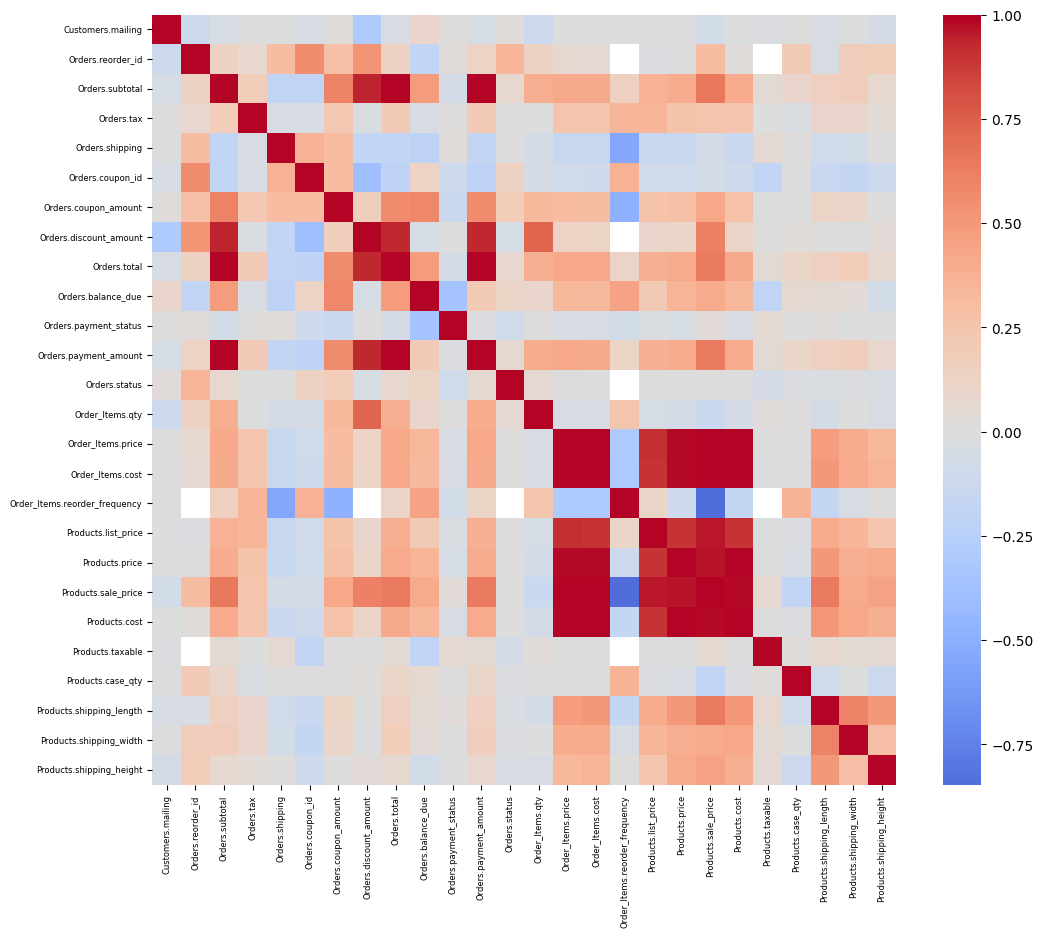

In [46]:
plt.figure(figsize=(12, 10), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(rotation=0, fontsize=6)

plt.show()

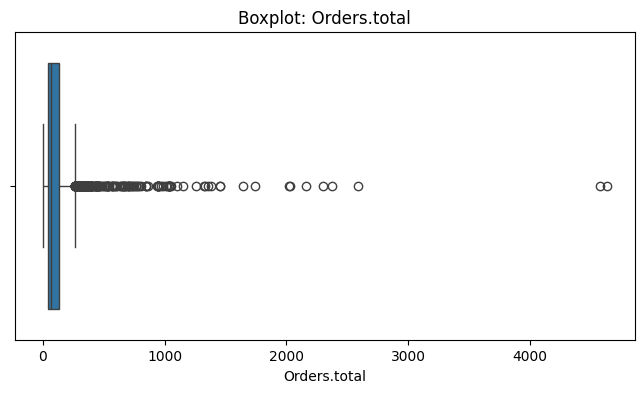

In [152]:
plt.figure(figsize=(8, 4))

sns.boxplot(data=df, x='Orders.total')

plt.title("Boxplot: Orders.total")
plt.show()


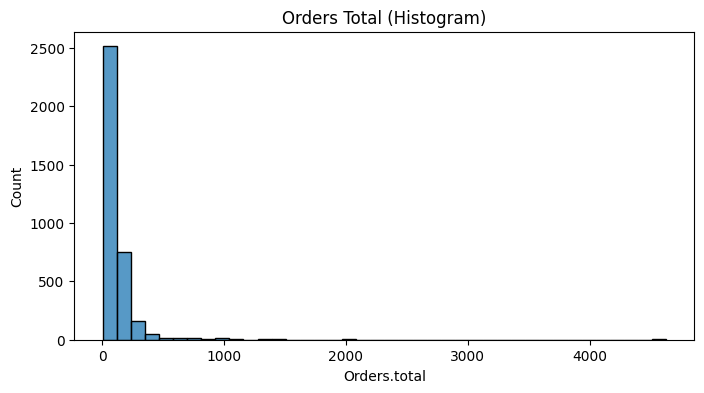

In [151]:
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='Orders.total', bins=40)

plt.title('Orders Total (Histogram)')
plt.show()

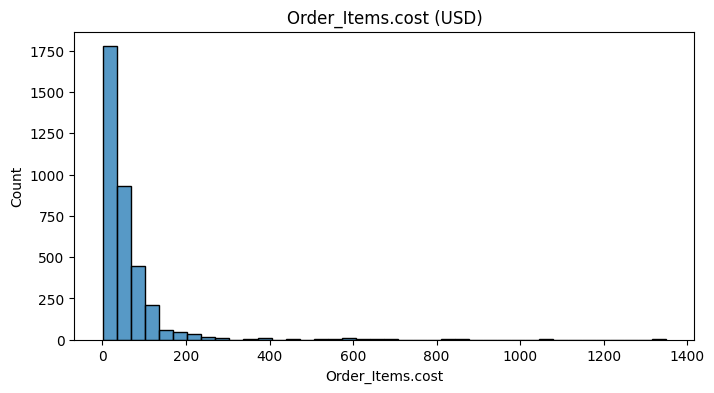

In [150]:
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='Order_Items.cost', bins=40)

plt.title("Order_Items.cost (USD)")

plt.show()

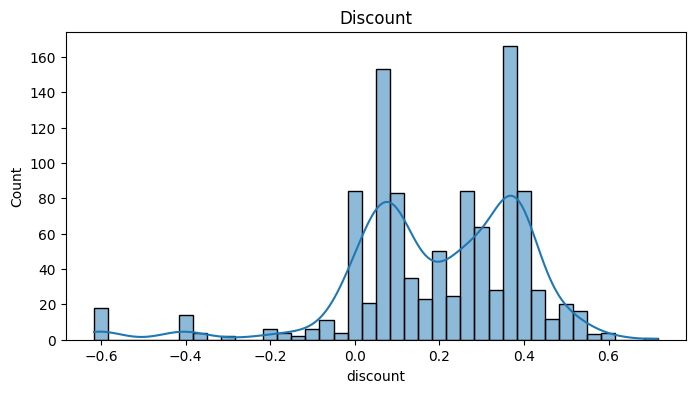

In [ ]:
# % розподіл величини знижки
df['discount'] = (df['Products.price'] - df['Products.sale_price']) / df['Products.price']

plt.figure(figsize=(8,4))

sns.histplot(df, x='discount', bins=40, kde=True)
plt.title('Discount')
plt.show()

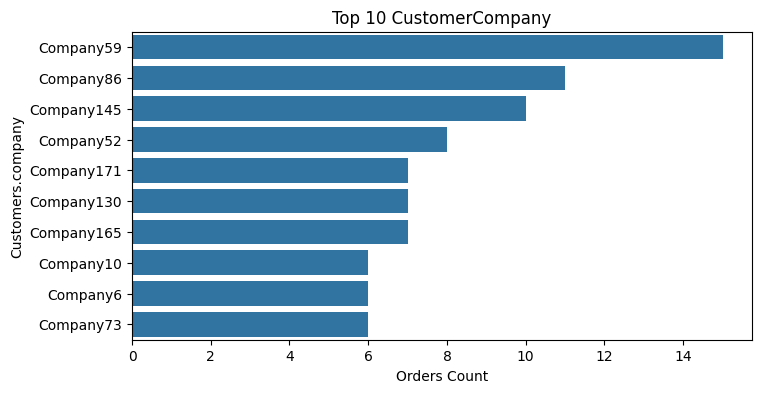

In [149]:
top_company = df['Customers.company'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_company.values, y=top_company.index)
plt.title("Top 10 CustomerCompany")
plt.xlabel("Orders Count")
plt.show()

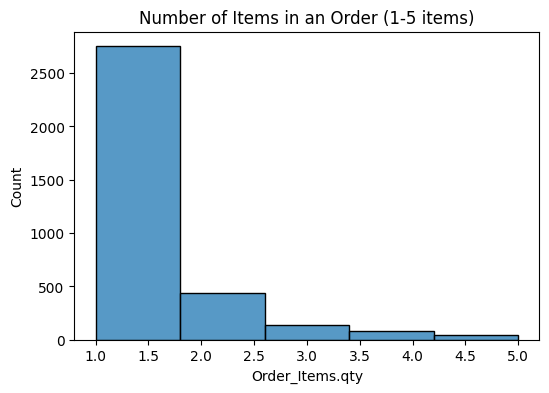

In [141]:
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

sns.histplot(data=small_qty, x='Order_Items.qty', bins=5)

plt.title('Number of Items in an Order (1-5 items)')

plt.show()

In [ ]:
# Clean text fields

text_cols = df.select_dtypes(include='object').columns
text_cols


Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Orders.id', 'Orders.customer_id',
       'Orders.company', 'Orders.order_number', 'Orders.discount_name',
       'Orders.shipping_method', 'Order_Items.id', 'Order_Items.parent',
       'Order_Items.product_id', 'Order_Items.product_name', 'Products.id',
       'Products.vendor', 'Products.import_id', 'Products.name',
       'Products.display_name', 'Products.shopping_mpn',
       'Products.shopping_color', 'Products.unit', 'Products.packaging',
       'Products.family_id'],
      dtype='object')

In [ ]:
# Clean text fields

text_cols = [ 'Customers.fname', 'Customers.lname',
            'Customers.company', 
            'Orders.company', 'Orders.discount_name',
            'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.display_name', 
            'Products.shopping_color'
            ]

In [ ]:
####################################             SEPARATE DATAFRAMES

df_customers = df.filter(like="Customers.")
df_orders = df.filter(like="Orders.")
df_products = df.filter(like="Products.")
df_items = df.filter(like="Order_Items.")     

In [ ]:
df_customers.info()   

In [199]:
df_customers[df_customers["Customers.id"] == 10]

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified
9,10,Tommy,Smith,NaN,2014-01-23 20:38:36,0.0,2015-07-24 18:45:53


In [197]:
for row in range(len(df_customers)):
    if pd.isna(df_customers.iloc[row, 5]):  
        df_customers.iloc[row, 5] = 0

# oder

df_customers['Customers.mailing'] = df_customers['Customers.mailing'].fillna(0)   

C:\Users\Anna\AppData\Local\Temp\ipykernel_31996\3404354677.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Customers.mailing'] = df_customers['Customers.mailing'].fillna(0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customers.id             4194 non-null   object        
 1   Customers.fname          4194 non-null   object        
 2   Customers.lname          4194 non-null   object        
 3   Customers.company        727 non-null    object        
 4   Customers.create_date    4194 non-null   datetime64[ns]
 5   Customers.mailing        4194 non-null   float64       
 6   Customers.last_modified  4194 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 229.5+ KB


In [ ]:
for row in range(len(df_orders)):
    if pd.isna(df_orders.iloc[row, 4]):  
        df_orders.iloc[row, 4] = 0

#df_orders.iloc[:, [5, 6, 7, 9, 11, 13]] = df_orders.iloc[:, [5, 6, 7, 9, 11, 13]].fillna(0)

cols_oders = [
    'Orders.reorder_id', 'Orders.subtotal', 'Orders.tax', 'Orders.shipping',
    'Orders.coupon_amount', 'Orders.discount_amount', 'Orders.balance_due'
]
df_orders[cols_oders] = df_orders[cols_oders].fillna(0)


df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3565 entries, 0 to 4193
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Orders.id                3565 non-null   object        
 1   Orders.customer_id       3565 non-null   object        
 2   Orders.company           569 non-null    object        
 3   Orders.order_number      3565 non-null   object        
 4   Orders.reorder_id        3565 non-null   float64       
 5   Orders.subtotal          3565 non-null   float64       
 6   Orders.tax               3565 non-null   float64       
 7   Orders.shipping          3565 non-null   float64       
 8   Orders.coupon_id         640 non-null    float64       
 9   Orders.coupon_amount     3565 non-null   float64       
 10  Orders.discount_name     267 non-null    object        
 11  Orders.discount_amount   3565 non-null   float64       
 12  Orders.total             3565 non-null 

C:\Users\Anna\AppData\Local\Temp\ipykernel_15368\2279442762.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders[cols_oders] = df_orders[cols_oders].fillna(0)


In [ ]:
df_orders
#df['Orders.id'].nunique()


,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,...,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date
0,3758,797,Company0,3758,0.0,57.20,0.00,9.95,13.0,2.86,...,11|Ground,3.0,2015-03-10 20:24:59,authorize.net,NaN,64.29,1,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42
1,23,3,Company1,23,0.0,20.00,0.00,9.99,NaN,0.00,...,11|Ground,3.0,2013-12-03 17:07:35,authorize.net,NaN,29.99,1,2013-12-03 17:07:35,2015-08-25 18:49:43,2013-12-03 20:30:21
2,9531,3,Company1,9531,0.0,68.78,0.00,9.95,NaN,0.00,...,0|Standard Shipping,3.0,2015-12-08 19:40:52,authorize.net,NaN,78.73,3,2015-12-08 19:40:52,2015-12-15 21:04:47,NaT
3,29,4,NaN,29,0.0,19.56,0.00,9.95,NaN,0.00,...,11|Ground,3.0,2013-12-11 16:44:23,NaN,Credit Card,29.55,1,2013-12-11 16:44:23,2015-08-25 18:49:43,2013-12-11 22:15:32
4,30,5,Company3,30,0.0,36.05,0.00,9.95,NaN,0.00,...,11|Ground,3.0,2013-12-12 15:19:59,NaN,Credit Card,46.00,1,2013-12-12 15:19:59,2015-08-25 18:49:43,2013-12-12 19:13:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,17421,3730,NaN,17421,0.0,14.85,1.21,0.00,NaN,0.00,...,NaN,3.0,2016-05-16 14:27:34,paypal,PayPal,16.06,0,2016-05-16 14:27:34,NaT,NaT
4190,17425,3732,NaN,17425,0.0,39.99,0.00,0.00,NaN,0.00,...,NaN,1.0,2016-05-16 15:32:37,authorize.net,NaN,39.99,0,2016-05-16 15:32:37,NaT,NaT
4191,17426,3733,NaN,17426,0.0,1099.00,0.00,0.00,32.0,109.90,...,NaN,1.0,2016-05-16 15:40:46,authorize.net,NaN,989.10,5,2016-05-16 15:40:46,2016-05-16 17:36:53,NaT
4192,17431,3735,NaN,17431,0.0,129.99,0.00,0.00,NaN,0.00,...,NaN,3.0,2016-05-16 16:38:14,paypal,PayPal,129.99,0,2016-05-16 16:38:14,NaT,NaT


In [124]:
df_orders['Orders.id'].value_counts()


Orders.id
3758     1
23       1
9531     1
29       1
30       1
        ..
17421    1
17425    1
17426    1
17431    1
17434    1
Name: count, Length: 3565, dtype: int64

In [125]:
df_orders[df_orders['Orders.id'] == 7357]

,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,...,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date
2058,7357,1730,Company159,7357,0.0,938.18,0.0,0.0,NaN,0.0,...,-1|Free Shipping,3.0,2015-10-26 20:31:32,authorize.net,NaN,938.18,1,2015-10-26 20:31:32,2015-11-18 16:23:39,2015-11-05 15:18:20


In [ ]:
################ DUPLIKATES REMOVAL

df = df.drop_duplicates(
    subset=["Orders.id", "Orders.placed_date"],
    keep="first"          
)

In [41]:
df_products = df.filter(like="Products.")

In [43]:
df_products.info()
df_products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Products.id               4037 non-null   object        
 1   Products.status           4037 non-null   category      
 2   Products.vendor           4037 non-null   category      
 3   Products.import_id        4037 non-null   object        
 4   Products.name             4037 non-null   object        
 5   Products.display_name     3662 non-null   object        
 6   Products.list_price       4017 non-null   float64       
 7   Products.price            4036 non-null   float64       
 8   Products.sale_price       1160 non-null   float64       
 9   Products.cost             4037 non-null   float64       
 10  Products.last_modified    4037 non-null   datetime64[ns]
 11  Products.taxable          2959 non-null   float64       
 12  Products.shopping_br

,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.sale_price,Products.cost,...,Products.shopping_mpn,Products.shopping_color,Products.unit,Products.packaging,Products.case_qty,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.handling_time,Products.family_id
0,2310.0,0.0,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,NaN,44.00,...,MDS86850EGS,Green,EA,1 Each / Each,1.0,24.80,7.50,30.40,NaN,PF61071
1,177.0,1.0,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,5.00,1.87,...,DYNC1674H,NaN,EA,1 Each / Each,1.0,8.00,7.00,1.50,NaN,PF02132
2,1.0,0.0,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,NaN,52.50,...,484805,Blue,CS,800 Each / Case,800.0,13.23,10.04,10.24,NaN,PF00342
3,983.0,0.0,1.0,3.0,Basket for 2-Button Walkers,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,...,MDS86615KH,NaN,EA,1 Each / Each,1.0,10.60,7.80,18.50,NaN,PF04970
4,991.0,1.0,1.0,3.0,TENS 3000 Analog Unit,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,...,MDS86710,NaN,EA,1 Each / Each,1.0,8.50,2.75,12.00,NaN,PF03045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1842.0,3.0,1.0,3.0,"Emesis Bags,Blue,36.000 OZ","Medline Emesis/Barf Bags, throw up bags, Blue ...",33.11,23.65,14.85,15.50,...,NON80328Z,Blue,PK,24 Each / Pack,24.0,5.00,5.00,7.00,NaN,PF06157
4190,782.0,3.0,1.0,3.0,Bed Assist Bar,Medline Home Bed Assist Bar,55.19,69.99,39.99,28.16,...,MDS6800BAH,NaN,EA,1 Each / Each,1.0,14.60,4.10,18.00,NaN,PF08485
4191,2707.0,3.0,2.0,1.0,Spitfire EX Compact Travel Power Mobility Scoo...,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,2107.50,1099.00,NaN,675.00,...,spitfire142016fs21,"Red, Blue, Silver",EA,NaN,NaN,45.00,20.75,20.75,Ships Same Day,PM36
4192,993.0,3.0,1.0,3.0,"Standard Bariatric Heavy Duty Rollator,Burgund...","Standard Bariatric Heavy Duty Rollator, Burgun...",175.81,129.99,129.99,91.00,...,MDS86800XW,Burgundy,EA,1 Each / Each,1.0,25.25,8.60,23.20,NaN,PF04829


In [46]:
df_products['Products.vendor'] = df_products['Products.vendor'].astype('object')
# df_products['Products.vendor'] = df_products['Products.vendor'].astype('category')

C:\Users\Anna\AppData\Local\Temp\ipykernel_11380\3232776271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['Products.vendor'] = df_products['Products.vendor'].astype('object')


In [47]:
#df_products['Products.vendor'].isna().sum(), df_products['Products.vendor'].nunique(), 
df_products['Products.vendor'].unique()
#змінити тип поля, замінити вендор айді на тектовий вендо А-Б-В


array([1.0, nan, 2.0, 7.0, 4.0, 5.0, 11.0, 9.0, 10.0], dtype=object)

In [48]:

mapping = {
    1: "Vendor_A",
    2: "Vendor_B",
    3: "Vendor_C",
    4: "Vendor_D",
    5: "Vendor_E",
    6: "Vendor_F",
    7: "Vendor_G",
    8: "Vendor_H",
    9: "Vendor_I",
    10: "Vendor_J",
    11: "Vendor_K"
}

df_products["Products.vendor"] = df_products["Products.vendor"].map(mapping)


C:\Users\Anna\AppData\Local\Temp\ipykernel_11380\4043600824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["Products.vendor"] = df_products["Products.vendor"].map(mapping)


In [49]:
df_products['Products.vendor'].unique()

array(['Vendor_A', nan, 'Vendor_B', 'Vendor_G', 'Vendor_D', 'Vendor_E',
       'Vendor_K', 'Vendor_I', 'Vendor_J'], dtype=object)

In [ ]:
cols_products = ['Products.vendor']
df_products[cols_products] = df_orders[cols_products].fillna(0)


#df_products.iloc[:, [2]] = df_products.iloc[:, [2]].fillna(0)